In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
data1 =  np.exp(np.random.normal(0, 1, size=10000))**(1/2)

data2 = np.random.normal(1, 1, size=10000)
min2 = np.min(data2)
data2 = data2 - min2

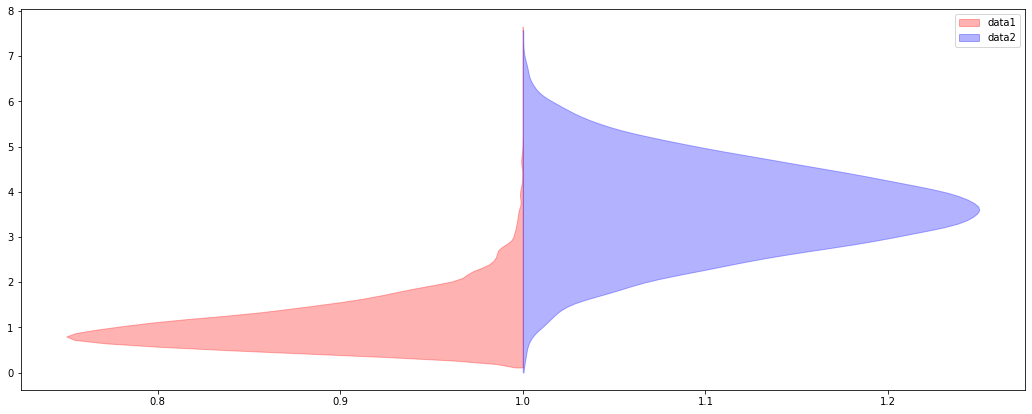

In [3]:
fig, ax = plt.subplots(figsize=(18, 7))

v1 = ax.violinplot(data1, points=100, showmeans=False, showextrema=False, showmedians=False)
for b in v1['bodies']:
    # get the center
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # modify the paths to not go further right than the center
    b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
    b.set_color('r')

v2 = ax.violinplot(data2, points=100, showmeans=False, showextrema=False, showmedians=False)

for b in v2['bodies']:
    # get the center
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # modify the paths to not go further left than the center
    b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, np.inf)
    b.set_color('b')

ax.legend([v1['bodies'][0],v2['bodies'][0]],['data1', 'data2'])
plt.show()